In [105]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,5) # Make the figures a bit bigger
from IPython.display import display, clear_output

In [106]:
# run = '190131-1707' #reduced P2
# run = '180906-1938' #raw P2
# run = '190406-1532' #reduced P1 - identical to P2
# run = '190406-1534' #raw P1 - identical to P2
# run = '180906-1938/190408-1832' #raw P1 from Phase 2 DNN Epoch 23
run = '180906-1938/190408-1939' #raw P1 from Phase 2 DNN Epoch 0

In [107]:
folderRUNS = '/home/vault/capm/sn0515/PhD/DeepLearning/bbDiscriminator/TrainingRuns/'
run = os.path.join(folderRUNS, run)
historyFile = os.path.join(run, 'history.csv')
logFile = os.path.join(run, 'log_train.txt')
assert os.path.isdir(run)==True
assert os.path.isfile(historyFile)==True
assert os.path.isfile(logFile)==True

In [108]:
def plot_loss(dirOut, dataHist, dataLog):
    for i in reversed(range(len(dataLog))):
        plt.plot(dataLog[i][1], dataLog[i][4], label='Valid-%i (Log)'%i)
        plt.plot(dataLog[i][1], dataLog[i][2], label='Train-%i (Log)'%i)
    plt.plot(dataHist[0]+1.0, dataHist[4], lw=2, label='Valid (Hist)')
    plt.plot(dataHist[0]+1.0, dataHist[2], lw=2, label='Train (Hist)')
    plt.xlabel('Training time [epoch]')
    plt.ylabel('Loss')
    plt.grid(True, which='both')
    plt.xlim(xmin=0)
#     plt.gca().set_yscale('log')
    plt.legend(loc="best", ncol=2)
    if dirOut != '':
        plt.savefig(os.path.join(dirOut, 'history-loss.pdf'), bbox_inches='tight')

In [109]:
def plot_accuracy(dirOut, dataHist, dataLog):
#     plt.axhline(y=50, color='k')
    for i in reversed(range(len(dataLog))):
        plt.plot(dataLog[i][1], 100. * dataLog[i][5], label='Valid-%i (Log)'%i)
        plt.plot(dataLog[i][1], 100. * dataLog[i][3], label='Train-%i (Log)'%i)
    plt.plot(dataHist[0]+1.0, 100. * dataHist[3], lw=2, label='Valid (Hist)')
    plt.plot(dataHist[0]+1.0, 100. * dataHist[1], lw=2, label='Train (Hist)')
    plt.grid(True)
#     plt.ylim(ymin=45.0, ymax=100.0)
    plt.xlim(xmin=0)
    plt.legend(loc="best", ncol=2)
    plt.xlabel('Training time [epoch]')
    plt.ylabel('Accuracy [%]')
    if dirOut != '':
        plt.savefig(os.path.join(dirOut, 'history-accuracy.pdf'), bbox_inches='tight')

In [110]:
dataHistory = np.loadtxt(historyFile, skiprows=1, delimiter='\t', unpack=True)
dataLog = []
path = ''
while True:
    logFile_temp = os.path.join(os.path.join(os.path.split(logFile)[0], path),
                        os.path.split(logFile)[1])
    print logFile_temp, os.path.isfile(logFile_temp)
    if os.path.isfile(logFile_temp):
        dataLog.append(np.loadtxt(logFile_temp, unpack=True))
    else: break
    path += '../'
# dataLog = np.asarray(dataLog)

/home/vault/capm/sn0515/PhD/DeepLearning/bbDiscriminator/TrainingRuns/180906-1938/190408-1939/log_train.txt True
/home/vault/capm/sn0515/PhD/DeepLearning/bbDiscriminator/TrainingRuns/180906-1938/190408-1939/../log_train.txt True
/home/vault/capm/sn0515/PhD/DeepLearning/bbDiscriminator/TrainingRuns/180906-1938/190408-1939/../../log_train.txt False


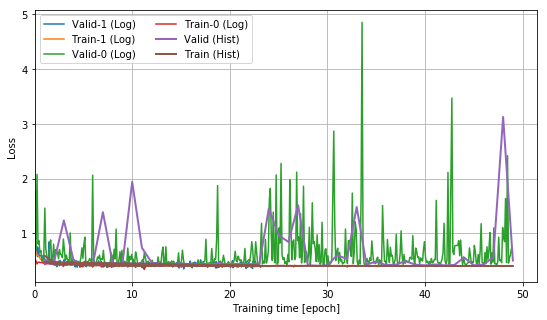

In [111]:
plot_loss(run, dataHistory, dataLog)

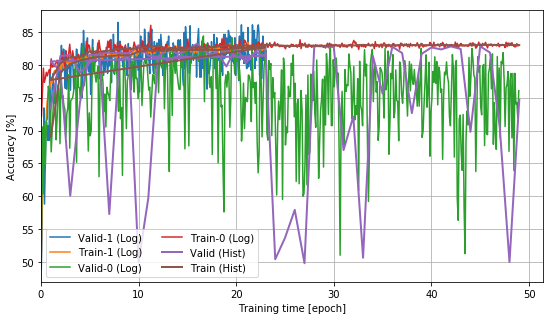

In [112]:
plot_accuracy(run, dataHistory, dataLog)